# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()
df.head(100)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29.0,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,50.0,United-States,<=50K
96,48.0,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,1902,NaN,United-States,>50K
97,37.0,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,48.0,United-States,>50K
98,48.0,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,NaN,England,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I have chosen the 1994 Census Income dataset that contains various demographic and employment-related information. This dataset includes features such as age, workclass, education level, marital status, occupation, race, and more. The goal is to predict the workclass of an individual based on the given features. The workclass variable represents different employment sectors. This is a supervised learning problem because we have labeled data (workclass) and we want to predict this label based on other features in the dataset. This is a classification problem since the label we are predicting (workclass) is categorical. Specifically, it is a multi-class classification problem. The features considered for the prediction include age. education level, income, race, occupation, marital status, hours worked per week, and native country. The purpose of finding work class could have multiple applications, I am mainly thinking about economic analysis for predicting future trends of the labour market and how these trends could help with policy making. But this could also be utilized by companies for marketing certain products and services to individuals. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [6]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspection of the data, there are two features that should be removed “fnlwgt” and “education”. The data has education in terms of years so having the two related data will cause redundancy. I also will do a heat map to check for any feature with a high correlation (above 0.9) with another feature. For categorical data types (objects), any missing values will result in the deletion of that example to maintain data integrity. For numerical features with missing values, these will be replaced with the column's mean to avoid introducing bias. Afterwards, I will apply one-hot encoding to categorical features to convert them into a numerical format for machine learning algorithms. Additionally, I need to transform the data to prevent high importance of certain data due to its numerical value. I would not be able to address class imbalance till afterwards when looking at confusion matrix to identify any. Adjusting weights or considering a different mode such as random forest or gradient boosting could help with these imbalances. The model I will use will be a neural network because of its ability to handle a large number of features. Training the model includes data splitting, model architecture with batch normalization, training and evaluation metrics using a confusion matrix. Afterwards I will be able to tune the models hyper parameters or possibly change the data if there is a high bias. 

In [7]:
#addressing missingness, such as replacing missing values with means
#finding and replacing outliers
#renaming features and labels

#performing feature engineering techniques such as one-hot encoding on categorical features
#selecting appropriate features and removing irrelevant features
#performing specific data cleaning and preprocessing techniques for an NLP problem
#addressing class imbalance in your data sample to promote fair AI

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization
import time

from tensorflow.keras.regularizers import l2
from sklearn.model_selection import GridSearchCV

2024-08-01 01:18:15.781465: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-01 01:18:15.781495: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [9]:
#Before creating labels and features, feature engieering to ensure clean readable data

In [10]:
#dropping irrevelent column first. 

df.drop(columns=['fnlwgt'], inplace=True)

#education and education num would be similiar, so lets get rid of one 

df.drop(columns=['education'], inplace=True)

#Relationship and marriage status are very similiar
df.drop(columns=['relationship'], inplace=True)

# After preforming two models I noticed from feature importance graph that native country feature
# plays little importance to making the model. Here I will drop the column.

df.drop(columns=['native-country'], inplace=True)




In [11]:
#next check the numerical columns for Nans 
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
na_counts = df[num_columns].isna().sum()
print(na_counts)


age               162
education-num       0
capital-gain        0
capital-loss        0
hours-per-week    325
dtype: int64


In [12]:
for col in num_columns:
    average = df[col].mean()
    df[col].fillna(average, inplace=True)

In [13]:
#check in ensure all data is cleaned
print(df[num_columns].isna().sum())

age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64


In [14]:
# Checking for na values in object columns, then will convert to one-hot
object_columns = df.select_dtypes(include=['object']).columns
na_counts = df[object_columns].isna().sum()
print(na_counts)

#given the total rows are 32561, lets see how many are available after removal of NA.
#Won't drop any features yet, only the examples will missing data 

workclass         1836
marital-status       0
occupation        1843
race                 0
sex_selfID           0
income_binary        0
dtype: int64


In [15]:
df.dropna(subset=object_columns, inplace=True)

In [16]:
na_counts = df[object_columns].isna().sum()
print(na_counts)
df.shape

workclass         0
marital-status    0
occupation        0
race              0
sex_selfID        0
income_binary     0
dtype: int64


(30718, 11)

In [17]:
#next to be done is a one-hot encoding categorical features

#not including work class due to it being the label needed to be predicted

categorical_features = [ 'occupation', 'marital-status', 'race', 'sex_selfID', 'income_binary']
df = pd.get_dummies(df, columns=categorical_features)

df.head()


,age,workclass,education-num,capital-gain,capital-loss,hours-per-week,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,marital-status_Widowed,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female,income_binary_<=50K,income_binary_>50K
0,39.0,State-gov,13,2174,0,40.0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,50.0,Self-emp-not-inc,13,0,0,13.0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2,38.0,Private,9,0,0,40.0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,53.0,Private,7,0,0,40.0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,28.0,Private,13,0,0,40.0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [18]:
#switch all numerial columns to floats for machine learning process 

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].astype('float64')


In [19]:
#scaling values to ensure none of deemed quantitatively more important 
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()


,age,workclass,education-num,capital-gain,capital-loss,hours-per-week,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,marital-status_Widowed,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female,income_binary_<=50K,income_binary_>50K
0,0.042103,State-gov,1.119909,0.629039,-0.219179,-0.080064,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0.882286,Self-emp-not-inc,1.119909,-0.257216,-0.219179,-2.342240,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2,-0.034277,Private,-0.441111,-0.257216,-0.219179,-0.080064,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,1.111426,Private,-1.221621,-0.257216,-0.219179,-0.080064,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,-0.798079,Private,1.119909,-0.257216,-0.219179,-0.080064,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [20]:
label_encoder = LabelEncoder()
df['workclass'] = label_encoder.fit_transform(df['workclass'])

In [21]:
df.head()

,age,workclass,education-num,capital-gain,capital-loss,hours-per-week,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,marital-status_Widowed,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female,income_binary_<=50K,income_binary_>50K
0,0.042103,5,1.119909,0.629039,-0.219179,-0.080064,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0.882286,4,1.119909,-0.257216,-0.219179,-2.342240,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2,-0.034277,2,-0.441111,-0.257216,-0.219179,-0.080064,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,1.111426,2,-1.221621,-0.257216,-0.219179,-0.080064,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,-0.798079,2,1.119909,-0.257216,-0.219179,-0.080064,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [22]:
df.dtypes


age                                     float64
workclass                                 int64
education-num                           float64
capital-gain                            float64
capital-loss                            float64
hours-per-week                          float64
occupation_Adm-clerical                   uint8
occupation_Armed-Forces                   uint8
occupation_Craft-repair                   uint8
occupation_Exec-managerial                uint8
occupation_Farming-fishing                uint8
occupation_Handlers-cleaners              uint8
occupation_Machine-op-inspct              uint8
occupation_Other-service                  uint8
occupation_Priv-house-serv                uint8
occupation_Prof-specialty                 uint8
occupation_Protective-serv                uint8
occupation_Sales                          uint8
occupation_Tech-support                   uint8
occupation_Transport-moving               uint8
marital-status_Divorced                 

In [23]:
df.shape

(30718, 36)

In [24]:
#features went from 15 to 99 after feautre engieering. 
#We will see which would be relevent to keep during evaluation, possibily delete a few

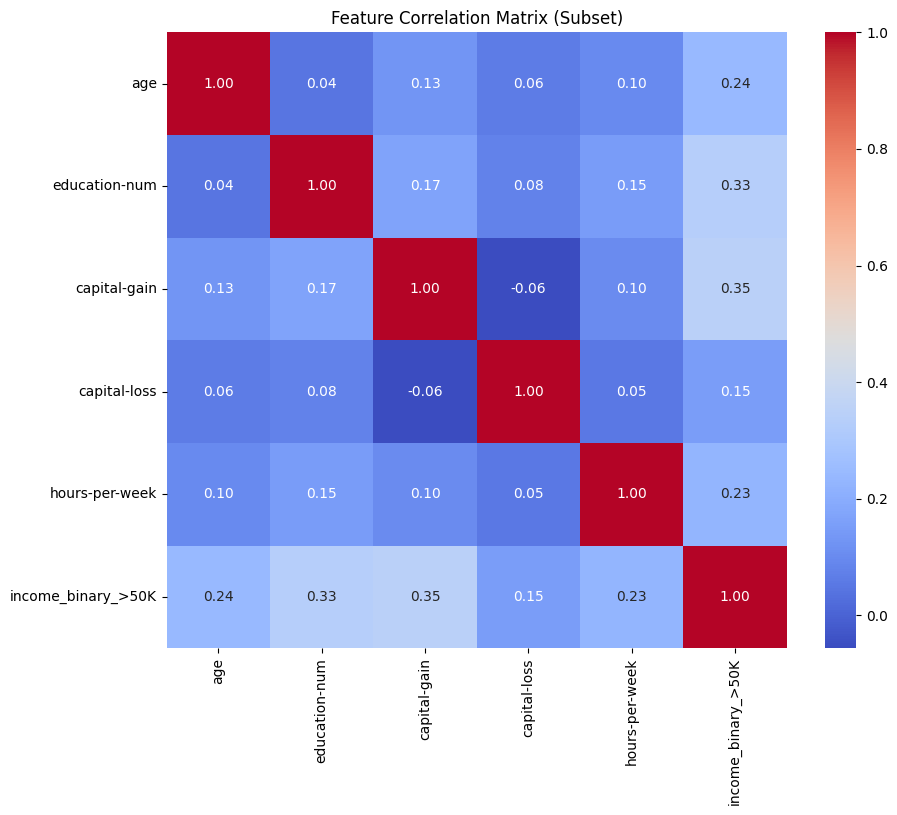

In [25]:
subset_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income_binary_>50K']

#correlation matrix for the subset of features
correlation_matrix_subset = df[subset_features].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix (Subset)')
plt.show()


In [26]:
#Label definition, and ensure np array for modeling purposes
#one-hot encode workclass into categorical choices
num_classes = len(np.unique(df['workclass']))
y = to_categorical(df['workclass'], num_classes=num_classes)

X = df.drop(columns=['workclass'])



X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.int32)


In [27]:
# creating and training dataset 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=1234)



In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#checking for NaNs and data type
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())

print("X_train data type:", X_train.dtype)
print("y_train data type:", y_train.dtype)


NaNs in X_train: 0
NaNs in y_train: 0
NaNs in X_test: 0
NaNs in y_test: 0
X_train data type: float32
y_train data type: int32


In [30]:
#Create model object:
nn_model = keras.Sequential()

 
# Create input layer & add input_layer to the model object
input_layer = keras.layers.InputLayer(input_shape = (X_train.shape[1],))
nn_model.add(input_layer)


# Create hidden layers and add it to the model object:



hidden_layer_2 = keras.layers.Dense(units=128, activation='relu')
nn_model.add(hidden_layer_2)
nn_model.add(BatchNormalization())


hidden_layer_3 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_3)
nn_model.add(BatchNormalization())


hidden_layer_4 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_4)
nn_model.add(BatchNormalization())


hidden_layer_5 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_5)
nn_model.add(BatchNormalization())

hidden_layer_6 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_6)
nn_model.add(BatchNormalization())




# Create output layer:
output_layer = keras.layers.Dense(units=num_classes, activation='softmax')
# Add output_layer to the model object:
nn_model.add(output_layer)


# Print summary of neural network model structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               4608      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1

2024-08-01 01:18:17.321911: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-01 01:18:17.321936: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-01 01:18:17.321954: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-034e47d1d1b9ca19d): /proc/driver/nvidia/version does not exist
2024-08-01 01:18:17.322126: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
# Define optimization function

sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.01)

# Define loss function
loss_fn = keras.losses.CategoricalCrossentropy()


#compile
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

In [32]:
# Fit model to training data (used from previous examples)

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [33]:
#Epochs 

t0 = time.time() # start time

num_epochs = 75 # epochs

history = nn_model.fit(X_train, y_train, epochs=num_epochs, verbose=0, 
                       callbacks=[ProgBarLoggerNEpochs(num_epochs)], 
                       validation_split=0.2)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

2024-08-01 01:18:17.448603: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-08-01 01:18:17.448935: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2650000000 Hz


Epoch [50/ 75], Loss: 0.7564, Accuracy: 0.7566, Val_loss: 0.8372, Val_accuracy: 0.7472
Elapsed time: 43.73s


In [34]:
# looking at training data:
# The high loss (.79) is an indication of very imbalance data. My biggest problem so far.
# I added L2 regularization to prevent overfitting. Results lead to higher loss function.
# I deleted a layer and kept l2 but the loss was still pretty high (.89 loss & .75 accuracy)

#I will delete regularization to see what happens then. I may have to decrease the majority data
# to improve varience. 

#I orginally had learning rate at .0001 which seemed to cause alot of issues. When I changed learning
# rate to be .01 I decrease loss to .72 with accuracy around .76. I am going to add one more layer with units = 64
# however they still resulted in .72 loss and accuracy around .76

# when I had increase number of features taken out relationship, race, 

# Overall these cases shown there is high overfitting of the model.

In [35]:
#evaluate models performance 

loss, accuracy = nn_model.evaluate(X_test, y_test)

print('Loss: {0} Accuracy: {1}'.format(loss, accuracy))

# Make predictions on the test set
probability_predictions = nn_model.predict(X_test)
class_label_predictions = np.argmax(probability_predictions, axis=1)


true_labels = np.argmax(y_test, axis=1)



240/240 [==============================] - 0s 521us/step - loss: 0.8696 - accuracy: 0.7391
Loss: 0.8696411848068237 Accuracy: 0.739062488079071


In [36]:
#confusion matrix evaluation 
c_m = confusion_matrix(true_labels, class_label_predictions)

print(c_m)


[[  13   17  224    1    3    3    0]
 [   3   87  405    0    8   11    0]
 [  27   67 5416   15  126   21    0]
 [   0    1  228    9   32    0    0]
 [   1   11  462    7  138    5    0]
 [   5   28  280    3    5   13    0]
 [   0    0    3    0    2    0    0]]


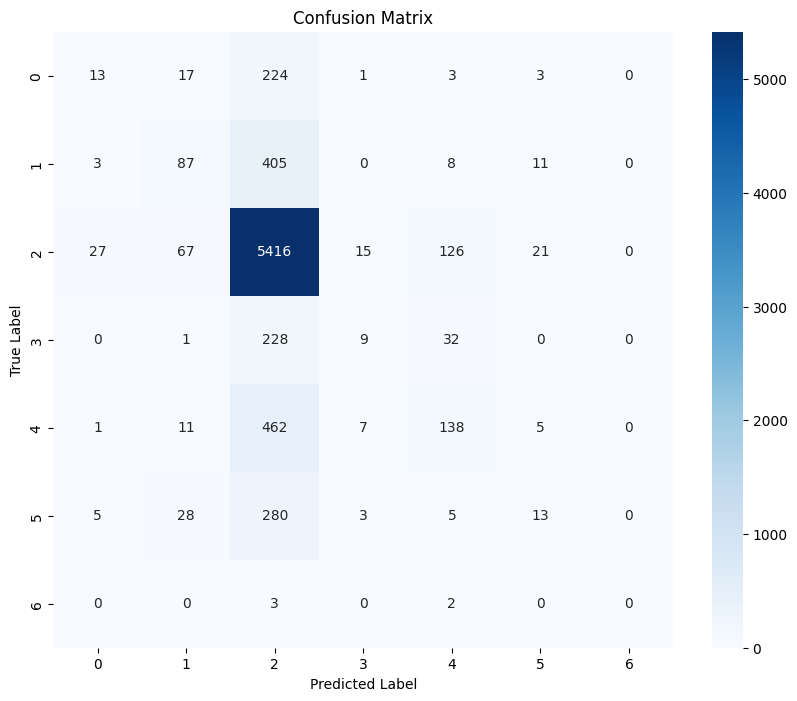

In [37]:

plt.figure(figsize=(10,8))
sns.heatmap(c_m, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [38]:
# First record findings, make improvements through feature engieering and tuning the model 
# the cm shows that its predicting most classes to be in label 3 which inidcates a poor diversity
# of the data and an imbalance in it. 
# though the model performed had high accuracy on test and validation, it failed with representation in mintority data.

# I will try a random forest classification to deal with the multiclass 

In [ ]:
# Similiar issues as before, I will evaluate feature importance. 

feature_importances = rfc.feature_importances_

feature_names = list(df.drop(columns=['workclass']).columns)
sorted_idx = feature_importances.argsort()
pos = np.arange(sorted_idx.shape[0]) + .5

fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(pos, feature_importances[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(feature_names)[sorted_idx], fontsize=8) 
ax.set_xlabel('Importance')
ax.set_title('Feature Importances')

plt.tight_layout()
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
# My label is in form of one-hot encode, now switch back to int 
y_int = np.argmax(y, axis=1)

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.2, random_state=42)


# Create random forest model 
rfc = RandomForestClassifier(
    n_estimators=70,  
    max_depth=20,  
    min_samples_split=5,  
    min_samples_leaf=2,  
    class_weight='balanced',  # this helps with imbalanced classes
    random_state=42
)


In [41]:
#grid search for best parameters
param_grid = {
    'n_estimators': [50, 70, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 70}


In [42]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5, n_estimators=70,
                       random_state=42)

In [43]:
y_pred = rfc.predict(X_test)

In [44]:

c_m = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(c_m)

Confusion Matrix:
[[  61   25   56   13   12   14    0]
 [  37  184  107   18   38   44    0]
 [ 401  300 2741  344  503  249    4]
 [   9    7   57   77   50   10    0]
 [  21   35  120   97  216   24    1]
 [  41   48   94   21   11   52    0]
 [   0    0    1    0    1    0    0]]


In [ ]:
#Noticing that native country has very low importance, I will remove it from in the feature engineering phase
# I deleted features similiarity, education and relationship. 
# I have found that this problem might require feature engieering out of the scope of this course.
# The heavy bias could lead to false postives in terms of predicting workclass.

# After applying grid search to the random forest, I recieved better confusion matrix. 
# Both neural network and random forest were not able to predict a varience of data, which may indicate 
# a lack of varience within the data itself. I tried choosing data with tones of features, maybe 
# it is the case that most people fall under this workclass at the given time, and the data would 
# look completely different for current trends. 
